# EDA Q1: Does the distance between a house and downtown Seattle affect house price?

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 1. Import Cleaned Data

In [101]:
data = pd.read_csv('cleaned_data.csv',index_col=0)
cleaned_data = data

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19087 entries, 0 to 19086
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19087 non-null  int64  
 1   date           19087 non-null  object 
 2   price          19087 non-null  float64
 3   bedrooms       19087 non-null  int64  
 4   bathrooms      19087 non-null  float64
 5   sqft_living    19087 non-null  int64  
 6   sqft_lot       19087 non-null  int64  
 7   floors         19087 non-null  float64
 8   waterfront     19087 non-null  float64
 9   view           19087 non-null  float64
 10  condition      19087 non-null  int64  
 11  grade          19087 non-null  int64  
 12  sqft_above     19087 non-null  int64  
 13  sqft_basement  19087 non-null  object 
 14  yr_built       19087 non-null  int64  
 15  yr_renovated   19087 non-null  float64
 16  zipcode        19087 non-null  int64  
 17  lat            19087 non-null  float64
 18  long  

In [103]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
1,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
2,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
3,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
4,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930


In [104]:
# dataframe for latitude and longitude for each house, and price
df_house_location = data[['price','lat','long']]

df_house_location.head()

,price,lat,long
0,538000.0,47.7210,-122.319
1,180000.0,47.7379,-122.233
2,604000.0,47.5208,-122.393
3,510000.0,47.6168,-122.045
4,1230000.0,47.6561,-122.005


## 2. Calculate Distance Between House and Downtown Seattle

In [105]:
from haversine import haversine, Unit

In [106]:
# latitude and longitude of downtown seattle
downtown_seattle_location = (47.608013, -122.335167)

# latitude and longitude of each house in the cleaned dataset
house_location = list(zip(data['lat'],data['long']))

# calculate distance in miles between each house and downtown seattle
distance = pd.DataFrame({'distance':[round(haversine(downtown_seattle_location, house, unit='mi'),2) 
                                     for house in house_location]})
distance.head()

,distance
0,7.84
1,10.16
2,6.60
3,13.53
4,15.73


In [107]:
# concat house and distance into one dataframe
house_distance = pd.concat([df_house_location, distance],axis=1)
house_distance.head()

,price,lat,long,distance
0,538000.0,47.7210,-122.319,7.84
1,180000.0,47.7379,-122.233,10.16
2,604000.0,47.5208,-122.393,6.60
3,510000.0,47.6168,-122.045,13.53
4,1230000.0,47.6561,-122.005,15.73


## 3. Check Linearity Assumption

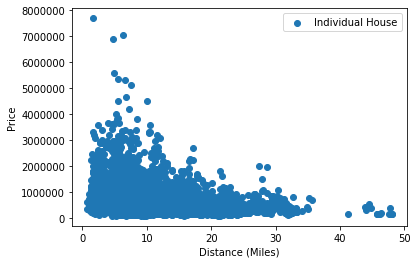

In [108]:
plt.scatter(house_distance['distance'],house_distance['price'],label='Individual House')
plt.xlabel('Distance (Miles)')
plt.ticklabel_format(style='plain')
plt.ylabel('Price')
plt.legend()
plt.show()

## 4. Check Normality for Variables

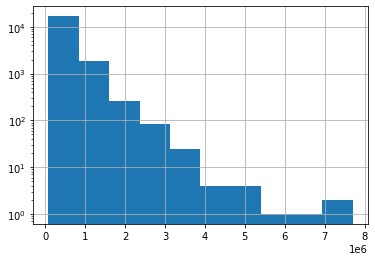

In [111]:
house_distance['price'].hist().set_yscale('log')

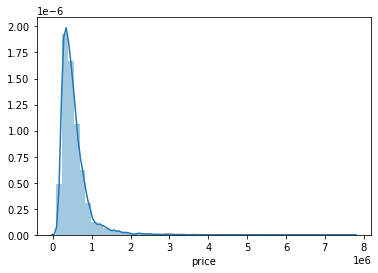

In [112]:
sns.distplot(house_distance['price']);

In [ ]:
sns.distplot(house_distance['distance']);

## 5. Simple Linear Regression

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
f = 'price~distance'

model = ols(formula=f,data=house_distance).fit()
model.summary()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'distance',fig=fig)
plt.show()

## 6. Normality Check

In [ ]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)
fig.show()

# Conclusion

* There is no relationship between price and distance between the home and downtown seattle.
* Normality for each variables are very skewed.
* Normality for the residuals is very curved and distorted meaning the residuals hae a non-normal distribiution.
* Low R-squared in which there is no good fit.
* There is heteroscedasticity in the data indicating variability is unequal across the distance values.

Overall, this was definitely not a good model with an R-squared of 0.083.

In [ ]:
import pandas as pd 
import folium
from folium.plugins import HeatMap

# for_map = pd.read_csv('campaign_contributions_for_map.tsv', sep='\t')

max_amount = float(random_test['price'].max())

hmap = folium.Map(location=[47.608013, -122.335167], zoom_start=9)
hmap

hm_wide = HeatMap( list(zip(random_test['lat'], random_test['long'], random_test['price'])),
                   min_opacity=0.01,
                   max_val=max_amount,
                   radius=10, blur=50, 
                   max_zoom=5, 
                 )

# folium.GeoJson(district23).add_to(hmap)
hmap.add_child(hm_wide)

In [ ]:
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations,weights=prices))
fig

In [ ]:
# import libraries
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
# import street map
street_map = gpd.read_file('WA_State_Boundary-shp/WA_State_Boundary.shp')

In [ ]:
geo_df.head()

In [ ]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
# geo_df.plot(column='price',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
# plt.title('Rental Prices in NYC', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
# plt.xlim(-74.02,-73.925)
# plt.ylim( 40.7,40.8)
# show map
plt.show()